In [13]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import random as rnd
from functools import reduce
import networkx as nx
from dataclasses import dataclass
from time import sleep
from matplotlib import rc
from IPython.display import HTML

In [14]:
dT = 50
seed = 5

In [15]:
"""
def make_network(w: int, h: int) -> int:
  rnd.seed(seed)

  def is_connected() -> bool:
    # return True
    return rnd.random() >= 0.5
  
  def get_potential_neighbours(x: int, y: int) -> list[int]:
    raw = [(x + dx, y + dy) 
           for dx in [-1, 0, 1] 
           for dy in [-1, 0, 1] 
           if not (dx == dy == 0)
          ]

    return [p for p in raw if 0 <= p[0] < w and 0 <= p[1] < h]

  spins = [[rnd.choice([-1, 1]) for x in range(0, w)] for y in range(0, h)]
  neighbours = [
      [ [p for p in get_potential_neighbours(x, y) if is_connected()]
        for x, _ in enumerate(row)
      ] 
      for y, row in enumerate(spins)
    ]

  return spins, neighbours

s, n = make_network(5,5)
"""

'\ndef make_network(w: int, h: int) -> int:\n  rnd.seed(seed)\n\n  def is_connected() -> bool:\n    # return True\n    return rnd.random() >= 0.5\n  \n  def get_potential_neighbours(x: int, y: int) -> list[int]:\n    raw = [(x + dx, y + dy) \n           for dx in [-1, 0, 1] \n           for dy in [-1, 0, 1] \n           if not (dx == dy == 0)\n          ]\n\n    return [p for p in raw if 0 <= p[0] < w and 0 <= p[1] < h]\n\n  spins = [[rnd.choice([-1, 1]) for x in range(0, w)] for y in range(0, h)]\n  neighbours = [\n      [ [p for p in get_potential_neighbours(x, y) if is_connected()]\n        for x, _ in enumerate(row)\n      ] \n      for y, row in enumerate(spins)\n    ]\n\n  return spins, neighbours\n\ns, n = make_network(5,5)\n'

In [16]:
# fig = plt.figure()

# im = plt.imshow(f(x, y), animated=True)


# def updatefig(*args):
#     
#     im.set_array(f(x, y))
#     return im,
# 
# ani = animation.FuncAnimation(fig, updatefig, interval=150, blit=True)
# plt.show()

In [17]:
# error(d) := 1 - <8>/(d^2) = 4/d
# <8> = d^2 - 4d
# <5> = 4d - 4
# <3> = 4, d ≥ 2

# d = 20
# expected_deg = 4
# s, n = make_network(d, d)
# 
# degs = [len(ns) for row in n for ns in row]
# deg_std_dev = np.sqrt(sum([ np.abs(deg - expected_deg)**2 for deg in degs ])/len(degs))
# avg_deg = sum(degs)/len(degs)
# deg_rel_error = 1 - avg_deg/expected_deg
# 
# fig = plt.figure(dpi=100)
# im = plt.imshow(s, 'binary')
# plt.title(f'σ_deg = {round(deg_std_dev, 3)}, δ_deg = {round(deg_rel_error*100, 3)}%')

In [18]:
def bind_neighbours(w, h, ns):
  return [p for p in ns if 0 <= p[0] < w and 0 <= p[1] < h]
  
def get_potential_neighbours_even(d, p) -> list[int]:
  w, h = d
  x, y = p

  raw = [(x + dx, y + dy) 
          for dx in [-1, 0, 1] 
          for dy in [-1, 0, 1] 
          if not (dx == dy == 0)
        ]

  return bind_neighbours(w, h, raw)

def get_potential_neighbours_odd(d, p) -> list[int]:
  w, h = d
  x, y = p

  return bind_neighbours(w, h, [(x - 1, y), (x + 1, y), (x, y - 1), (x, y + 1)])

def get_potential_neighbours_even_odd(d, p) -> list[int]:
  w, h = d
  x, y = p

  return bind_neighbours(w, h, [(x - 1, y - 1), (x - 1, y + 1), (x + 1, y - 1), (x + 1, y + 1)])

def make_network2(w: int, h: int, p: float):
  rnd.seed(seed)

  def is_connected() -> bool:
    # return True
    return rnd.random() >= p
  
  ns = [[[] for y in range(0, h)] for x in range(0, w)]
  s = [[rnd.choice([-1, 1]) for y in range(0, h)] for x in range(0, w)]

  for y in range(0, h):
    for x in range(0, w):
      my = y % 2
      mx = x % 2

      f = lambda d, p: []
      if mx == my == 0:
        f = get_potential_neighbours_even
      elif mx == my == 1:
        f = get_potential_neighbours_odd
      elif mx == 0 and my == 1:
        f = get_potential_neighbours_even_odd

      pn = [e for e in f((w, h), (x, y)) if is_connected()] 

      ns[x][y].extend(pn)

      for xx, yy in pn:
        ns[xx][yy].append((x,y))

  return s, ns


In [19]:
def plot_graph(d, ns_matrix, dpi):
  w = h = d
  fig, ax = plt.subplots(dpi=dpi)
  
  fig.tight_layout()

  for x, column in enumerate(ns_matrix):
    for y, ns in enumerate(column):
      for xx, yy in ns:
        ax.plot([x, xx], [y, yy], 'k.-')

In [20]:
# p = 0.49210526315789477
def analise(d, p):
  expected_deg = 4

  s, n = make_network2(d,d, p)

  degs = [len(ns) for row in n for ns in row]
  deg_std_dev = np.sqrt(sum([ np.abs(deg - expected_deg)**2 for deg in degs ])/len(degs))
  # avg_deg = sum(degs)/len(degs)
  # deg_rel_error = 1 - avg_deg/expected_deg

  # print({'avg_deg':avg_deg, 'deg_std_dev':deg_std_dev, 'deg_rel_error':deg_rel_error})
  return deg_std_dev

# ps = np.linspace(0.5-0.1, 0.5+0.1, 100)
# ds = list(range(800, 1000, 100))
# [min([((d, p), analise(d, p)) for p in ps], key=lambda r: r[1]) for d in ds]

In [57]:
class Config:
  """
  Single MC config
  """

  spins:   list[list[ int ]]
  lattice: list[list[ list[int] ]]
  H: float
  J: float
  T: float
  kb: float

  def __init__(self, size: int,  H: float, J: float, T: float, kb: float):
    self.spins, self.lattice = make_network2(size, size, 0.5)
    self.H = H
    self.J = J
    self.T = T
    self.kb = kb

  """
  \Delta \mathcal{H} \{s_k -> -s_k\} = s_k (J \sum_{j \in \Delta_k} s_j + 2H)
  """
  def calc_delta_H(self, position: tuple[int, int]) -> float:
    x, y = position
    sk = self.spins[x][y]
    neighbours = [self.spins[xx][yy] for xx, yy in self.lattice[x][y]]

    return sk * ( self.J * sum(neighbours) + 2*self.H )

  def calc_energy(self) -> float:
    Hint = -1/2 * self.J * sum([ si * sum(self.lattice[x][y]) for x, column in enumerate(self.spins) for y, si in enumerate(column) ])
    Hh   = -self.H * sum([si for column in self.spins for si in column])

    return Hint + Hh

  def calc_magnetisation(self) -> float:
    return sum([ si for column in self.spins for si in column ]) / sum([ len(column) for column in self.spins ])

  def evolve(self):
    spins_to_switch = []

    for x, column in enumerate(self.spins):
      for y, sk in enumerate(column):
        dH = self.calc_delta_H((x, y))

        if dH <= 0 or rnd.random() < np.exp(-dH/(self.kb * self.T)):
          spins_to_switch.append((x, y))

    for x, y in spins_to_switch:
      self.spins[x][y] *= -1
    


In [58]:
# rc('animation', html='html5')
# 
# c = Config(100, 0, 1, 0.5, 1)
# 
# fig = plt.figure()
# t = 0
# dt = 150
# 
# def updatefig(*args):
#   # print(f't={t}, M={c.calc_magnetisation()}')
#   c.evolve()
#   im.set_array(c.spins)
# 
#   return im,
# 
# im = plt.imshow(c.spins, animated=True)
# anim = animation.FuncAnimation(fig, updatefig, interval=dt, frames=100, blit=True)
# HTML(anim.to_html5_video())

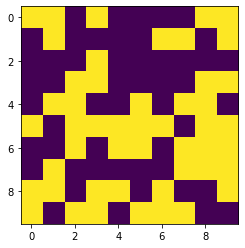

In [59]:
%matplotlib inline
c = Config(10, 1, 1, 0.5, 1)
plt.imshow(c.spins)

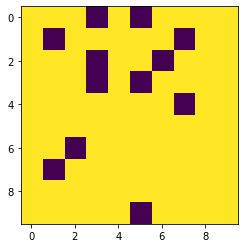

In [60]:
c.evolve()
plt.imshow(c.spins)